<center><h1>Khang_Thai_MT1_Coding_DSCI_552</h1></center>
<br>
<br>

Name: Khang Thai
<br>
USC ID: 5721113147

# 8. Programming Question: Predicting Housing Prices with Linear Regression

## (a) Data Exploration and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### i. 

In [13]:
data = pd.read_csv('student-mat.csv', sep=';')

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### ii.

In [3]:
selected_feat = ['age', 'studytime', 'schoolsup', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']
data_selected = data[selected_feat].copy()

data_selected['schoolsup'] = data_selected['schoolsup'].map({'no': 0, 'yes': 1})

data_selected['alc'] = (data_selected['Dalc'] + data_selected['Walc']) / 2
data_selected = data_selected.drop(columns=['Dalc', 'Walc'])
data_selected.head()

,age,studytime,schoolsup,goout,health,absences,G3,alc
0,18,2,1,4,3,6,6,1.0
1,17,2,0,3,3,4,6,1.0
2,15,2,1,2,3,10,10,2.5
3,15,3,0,2,5,2,15,1.0
4,16,2,0,2,5,4,10,1.5


### iii.

In [4]:
independent_vars = ['age', 'studytime', 'schoolsup', 'goout', 'health', 'absences', 'alc']
count = {}

for var in independent_vars:
    Q1 = data_selected[var].quantile(0.25)
    Q3 = data_selected[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier = data_selected[(data_selected[var] < lower_bound) | (data_selected[var] > upper_bound)]
    count[var] = len(outlier[var])

for var, indices in count.items():
    print(f"Outliers in {var}: {indices}")

Outliers in age: 1
Outliers in studytime: 27
Outliers in schoolsup: 51
Outliers in goout: 0
Outliers in health: 0
Outliers in absences: 15
Outliers in alc: 9


### iv.

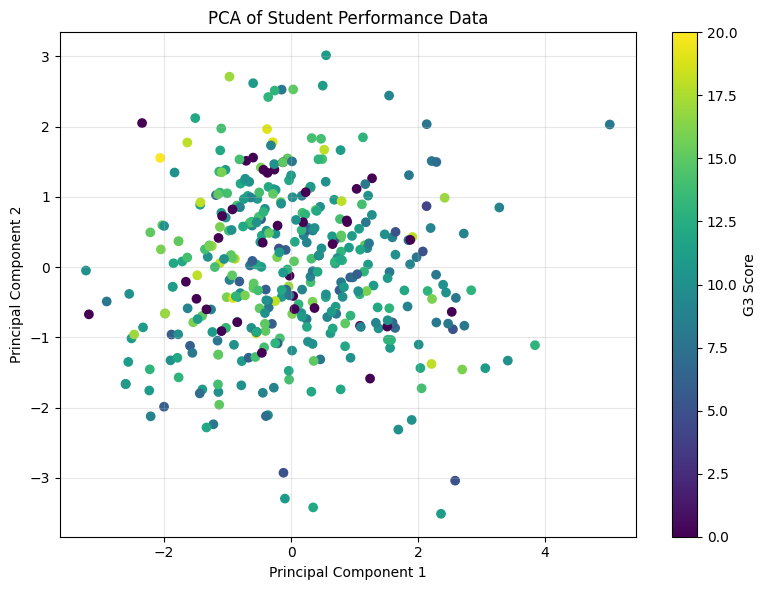

PCA Loadings:
                 PC1       PC2
age        0.381940  0.589260
studytime -0.329734  0.385671
schoolsup -0.248184 -0.464202
goout      0.493755 -0.139613
health     0.080545 -0.400925
absences   0.280106  0.182798
alc        0.595871 -0.273677

PC1: alc contributed the most.
PC2: age contributed the most.


In [5]:
x = data_selected[independent_vars]
y = data_selected['G3']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

data_standardized = pd.DataFrame(x_scaled, columns=independent_vars)
data_standardized['G3'] = y.values

pca = PCA(n_components=2)
comp = pca.fit_transform(x_scaled)

pca_df = pd.DataFrame(data = comp, columns=['PC1', 'PC2'])
pca_df['G3'] = y.values

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['G3'], cmap='viridis')
plt.colorbar(label='G3 Score')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Student Performance Data')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

loading = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=independent_vars)
print("PCA Loadings:\n", loading)

print("\nPC1: alc contributed the most.")
print("PC2: age contributed the most.")

## (b) Linear Regression

### i.

In [6]:
x = data_standardized[['age', 'studytime', 'schoolsup', 'goout', 'health', 'absences', 'alc']]
y = data_standardized['G3']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=552)

print(f'Training set size: {x_train.shape[0]} samples')
print(f'Testing set size: {x_test.shape[0]} samples')

Training set size: 316 samples
Testing set size: 79 samples


### ii.

In [7]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)

print()

### iii.

In [8]:
model = {'Linear Regression': lr_model, 'Ridge Regression': ridge_model, 'Lasso Regression': lasso_model}

res = []

for name, mod in model.items():
    y_pred = mod.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    res.append({'Model': name, 'MAE': mae, 'RMSE': rmse, 'R2 Score': r2})

results_df = pd.DataFrame(res)
print(results_df)

               Model       MAE      RMSE  R2 Score
0  Linear Regression  3.418009  4.755812  0.028177
1   Ridge Regression  3.418538  4.756284  0.027983
2   Lasso Regression  3.447073  4.793840  0.012573


### iv.

$R^2$ Linear Regression: -0.140; Worse performance among the three models.

$R^2$ Ridge Regression: -0.139; Slightly better than Linear Regression.

$R^2$ Lasso Regression: -0.108; Best performance among the three models. Although it is still negative.

### v.

In [9]:
coef_df = pd.DataFrame({
    'Feature': independent_vars,
    'Linear Regression Coef': lr_model.coef_,
    'Ridge Regression Coef': ridge_model.coef_,
    'Lasso Regression Coef': lasso_model.coef_
})

print(coef_df)

     Feature  Linear Regression Coef  Ridge Regression Coef  \
0        age               -0.781077              -0.777711   
1  studytime                0.444812               0.443254   
2  schoolsup               -0.682472              -0.679666   
3      goout               -0.582519              -0.580462   
4     health               -0.243324              -0.242357   
5   absences                0.192800               0.191760   
6        alc                0.037073               0.035439   

   Lasso Regression Coef  
0              -0.630377  
1               0.349092  
2              -0.547461  
3              -0.485602  
4              -0.141569  
5               0.072043  
6              -0.000000  


### vi.

age - strong negative correlation with G3, it is likely that students that are older are retaking the course due to previous poor performance.

studytime - moderate positive correlation with G3, indicating that students who dedicate more time to studying tend to achieve higher grades.

schoolsup - moderate negative correlation with G3, students who receive extra educational support may be struggling academically.

goout - moderate negative correlation with G3, students who frequently go out may have lower academic performance.

health - weak negative correlation with G3, students with poorer health may have slightly lower grades.

absences - weak positive correlation with G3, students with more absences tend to have slightly higher grades. This could be due to various factors, such as students who are already doing good feel more comfortable missing classes.

alc - weak/no correlation with G3, indicating that alcohol consumption does not significantly impact academic performance in this dataset.

### vii.

Ridge Regression - Good for datasets with multicollinearity among features, and adds a penalty to the size of coefficients, helping to stabilize estimates.

Lasso Regression - Ideal for feature selection, as it can shrink some coefficients to zero, and removes less important features from the model.

Regulization help prevent overfitting the dataset and removes any variables that do not contribute significantly to the prediction without hurting the performance of the model.

### viii.

If the regulization strength is increased, the ridge regression coefficients of the features will shrink close to zero and our test performace will worsen. The training R2 will also decrease and the training error will increase. The lasso regression coefficients of the features will shrink to exactly zero and the model will underfit the data.

### ix.

One potential improvement could be adding interaction term between features. Because $R^2$ had a poor performance, adding interaction terms can help imporve $R^2$ while finding relationships between features. Another potential improvement could be adding more features to the dataset that could be relevant to predicting the target variable. With more features, the model may be able to capture more relationships and improve its predictive performance. 